# Load titanic data

In [1]:
import pandas as pd
import numpy as np 
import sklearn

train = pd.read_csv('data/titanic/train.csv', index_col ="PassengerId")
print(train.shape)
print(train.info())
train.head()


(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('data/titanic/test.csv', index_col="PassengerId")
print(test.shape)
print(test.info())
test.head()

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing
    * string data to integer data
    * One Hot Encoding
    * null data processing

In [4]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# 1. male : 0 || female : 1
train.loc[train.Sex == 'male', 'Sex'] = 0
train.loc[train.Sex == 'female', 'Sex'] = 1
train.Sex

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    1
890    0
891    0
Name: Sex, Length: 891, dtype: object

In [9]:
test.loc[test.Sex == 'male', 'Sex'] = 0
test.loc[test.Sex == 'female', 'Sex'] = 1
test.Sex

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Sex, Length: 418, dtype: object

In [10]:
# 2. processing null data in 'Fare' column
test.loc[test.Fare.isnull()] 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [13]:
## this is "find with condition" and "assign" [find, assign_column] = assign_value
test.loc[test.Fare.isnull(), 'Fare'] = 0
print(test.loc[test.Fare.isnull()])

Empty DataFrame
Columns: [Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [14]:
# 3. Processing "Embarked" processing
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'
print(train.shape)
train[['Embarked', 'Embarked_C', 'Embarked_S','Embarked_Q']]

(891, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False
...,...,...,...,...
887,S,False,True,False
888,S,False,True,False
889,S,False,True,False


In [17]:
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'
print(test.shape)
test[['Embarked', 'Embarked_C', 'Embarked_S','Embarked_Q']]

(418, 13)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False
...,...,...,...,...
1305,S,False,True,False
1306,C,True,False,False
1307,S,False,True,False


In [18]:
mean_age = train.Age.mean()
mean_age

29.69911764705882

In [23]:
train.loc[train.Age.isnull(),'Age'] = mean_age
train.loc[train.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,


In [24]:
test_mean_age = test.Age.mean()
test.loc[test.Age.isnull(), 'Age'] = test_mean_age
test.Age

PassengerId
892     34.50000
893     47.00000
894     62.00000
895     27.00000
896     22.00000
          ...   
1305    30.27259
1306    39.00000
1307    38.50000
1308    30.27259
1309    30.27259
Name: Age, Length: 418, dtype: float64

# Data Visualization
    * counter plot
    * bar plot
    * point plot
    * dist plot
    * lm plot

In [29]:
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

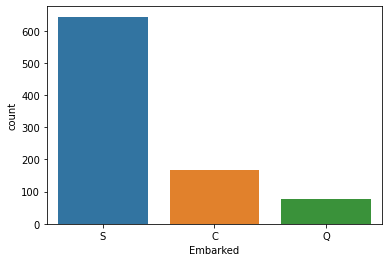

In [30]:
sns.countplot(data=train, x= 'Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

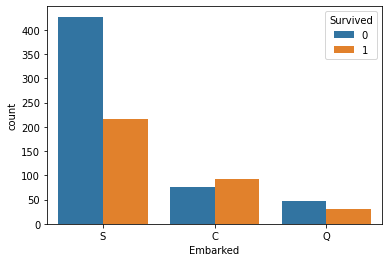

In [31]:
# relation between survived and embarked 
sns.countplot(data=train, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

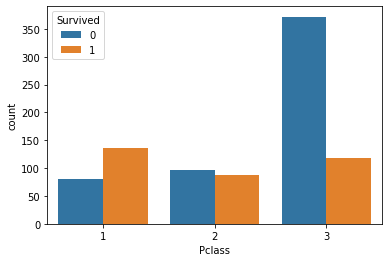

In [33]:
sns.countplot(data=train, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

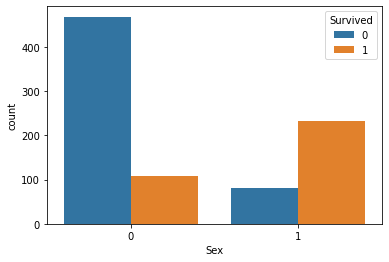

In [34]:
sns.countplot(data=train, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Age'>

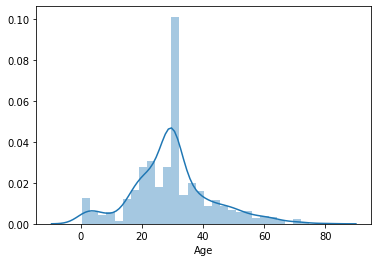

In [41]:
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Fare'>

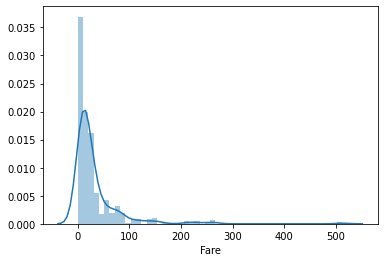

In [42]:
sns.distplot(train.Fare)

(838, 14)


<AxesSubplot:xlabel='Fare'>

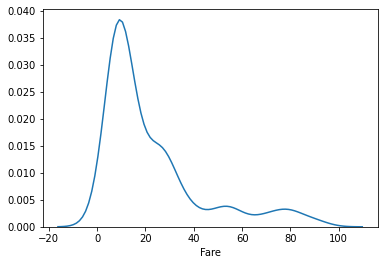

In [47]:
low_fare = train.loc[train.Fare < 100]
print(low_fare.shape)
sns.distplot(low_fare.Fare, hist= False)

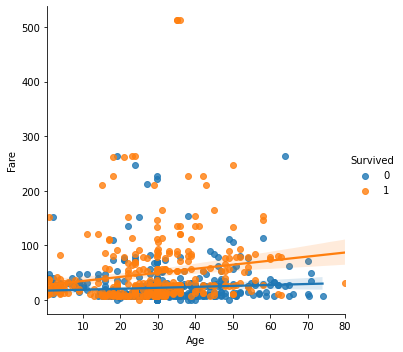

In [48]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')